In [29]:
import itertools
import linecache
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pprint
import scipy
import seaborn as sns
from matplotlib.transforms import Bbox

pp = pprint.PrettyPrinter(indent=4)

print("Using pandas %s version" % pd.__version__)
print("Using seaborn %s version" % sns.__version__)
print("Using scipy %s version" % scipy.__version__)

Using pandas 1.2.0 version
Using seaborn 0.11.1 version
Using scipy 1.6.0 version


In [30]:
is_legend_enabled = False

imfFull = "#548235"
imfTest = "#99C979"

knnFull = "#C55A11"
knnTest = "#ff5811"
normalizedKnnFull = "#4A76C6"
normalizedKnnTest = "#19C3FF"

average = "#FFC000"
popularity = "#F18F8F"
random = "#BFBFBF"

CorrelationWithUnbiasedEvaluation = "#C00000"
ExpectedIntersectionRatioInTopN = "#FFC000"
RatioOfTies = "#3333FF"
RatioOfTiesAtZero = "#006600"

rec_colors_dict = {
    "iMF (full)": "#548235",
    "iMF (test)": "#99C979",
    "kNN (full/test)": "#C55A11",
    "kNN (full)": "#C55A11",
    "kNN (test)": "#ff5811",
    "Normalized kNN (full)": "#4A76C6",
    "Normalized kNN (test)": "#19C3FF",
    "Average Rating": "#FFC000",
    "Popularity": "#F18F8F",
    "Random": "#BFBFBF",
    "Correlation with unbiased evaluation": CorrelationWithUnbiasedEvaluation,
    "Expected intersection ratio in top n": ExpectedIntersectionRatioInTopN,
    "Ratio of ties": RatioOfTies,
    "Ratio of ties at zero": RatioOfTiesAtZero,
    "Sum of p-values": "black",
}
# colors = ('red','blue','green','magenta', 'black', 'purple', 'grey', 'orange')
rec_colors = (
    imfFull,
    imfTest,
    knnFull,
    knnTest,
    normalizedKnnFull,
    normalizedKnnTest,
    average,
    popularity,
    random,
)

datasets = ["ml100k", "ml1m", "yahoo"]  #, "ml10m"
class_splits = ["", "-popular", "-unpopular"]  #, "-male", "-female", "-young", "-old"]
splits = []
for d in datasets:
    for c in class_splits:
        splits.append(d + c)

pp.pprint(splits)


def hide_spines(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)


data_dir = r"C:\Projects\RecSys2020\results\\"


# def split_list(a_list):
#     half = len(a_list) // 2
#     return a_list[:half], a_list[half:]


def get_figure_data(file_name):
    file = os.path.join(r"C:\Projects\RecSys2020\results", file_name)
    print(file)
    lines_with_metrics = [
        (i, linecache.getline(file, i + 1).strip())
        for i, line in enumerate(open(file))
        if line.endswith("@10\n")
    ]
    # print('\t' + lines_with_metrics)
    if (len(lines_with_metrics) == 1):
        print("single metric file")
        params = dict(filepath_or_buffer=file, sep="\t")
    else:
        rows = lines_with_metrics[2][0] - lines_with_metrics[1][0] - 3
        params = dict(filepath_or_buffer=file, sep="\t", nrows=rows)
    data = dict()
    for j, metric in enumerate(lines_with_metrics):
        metric_name = metric[1]
        metric_line = metric[0]
        data[metric_name] = pd.read_table(header=metric_line - j, **params)
    return data


dataset_names = {
    "ml100k": "MovieLens 100K",
    "ml1m": "MovieLens 1M",
    "yahoo": "Yahoo! R3",

    "ml100k-popular": "MovieLens 100K: Popular",
    "ml1m-popular": "MovieLens 1M: Popular",
    "yahoo-popular": "Yahoo! R3: Popular",

    "ml100k-unpopular": "MovieLens 100K: Unpopular",
    "ml1m-unpopular": "MovieLens 1M: Unpopular",
    "yahoo-unpopular": "Yahoo! R3: Unpopular",

    "": "Random",
    "-popular": "Popular",
    "-unpopular": "Unpopular",
}

[   'ml100k',
    'ml100k-popular',
    'ml100k-unpopular',
    'ml1m',
    'ml1m-popular',
    'ml1m-unpopular',
    'yahoo',
    'yahoo-popular',
    'yahoo-unpopular']


figure1.popular.png

ml100k
C:\Projects\RecSys2020\results\figure1.ml100k.txt
ml100k-popular
C:\Projects\RecSys2020\results\figure1.ml100k-popular.txt
ml100k-unpopular
C:\Projects\RecSys2020\results\figure1.ml100k-unpopular.txt
ml1m
C:\Projects\RecSys2020\results\figure1.ml1m.txt
ml1m-popular
C:\Projects\RecSys2020\results\figure1.ml1m-popular.txt
ml1m-unpopular
C:\Projects\RecSys2020\results\figure1.ml1m-unpopular.txt
yahoo
C:\Projects\RecSys2020\results\figure1.yahoo.txt
yahoo-popular
C:\Projects\RecSys2020\results\figure1.yahoo-popular.txt
yahoo-unpopular
C:\Projects\RecSys2020\results\figure1.yahoo-unpopular.txt


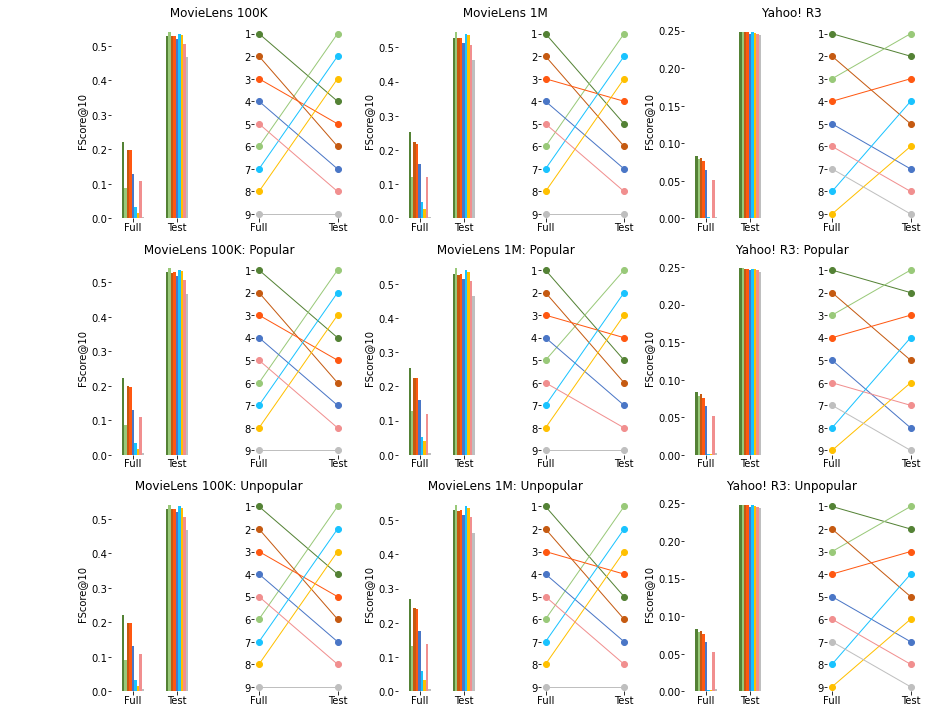

In [31]:
def plot_figure1(split, ax1, ax2):
    print(split)
    ax1.set_title("                                 " + dataset_names[split])
    figure1_data = get_figure_data("figure1." + split + ".txt")
    figure1_metric = 'FScore@10'
    fig1 = figure1_data[figure1_metric]
    plot_figure1_bars(ax1, fig1, split, figure1_metric)
    artists = plot_figure1_ranks(ax2, fig1)

    # ax2.set_position(Bbox([[-0.1, -0.1], [-0.1, -0.1]]))

    return (artists, fig1.Recommender)


def plot_figure1_ranks(ax2, fig1):
    data = [
        list(a)
        for a in zip(
            fig1.Recommender,
            fig1.Full.rank(ascending=False),
            fig1.Test.rank(ascending=False),
        )
    ]
    artists = []
    for row, color in zip(data, rec_colors):
        artist = plt.Line2D(
            xdata=[1, 2], ydata=[row[1:]], lw=1, color=rec_colors_dict[row[0]], marker="o"
        )
        ax2.add_artist(artist)
        artists.append(artist)
    ax2.set_ybound([0.5, len(artists) + 0.2])
    ax2.set_xbound([0.94, 2.06])

    hide_spines(ax2)

    ax2.invert_yaxis()
    ax2.set_xticks([1, 2])
    ax2.set_xticklabels(["Full", "Test"])
    # ax2.set_ylabel("Sistemos reitingas")
    return artists


def plot_figure1_bars(ax, data, split, metric):
    f1 = np.array(data)
    df = pd.DataFrame(index=["Full", "Test"])

    for i, r in enumerate(data.Recommender):
        df[r] = f1[i][1:]

    ax00 = df.plot(kind="bar", color=rec_colors, legend=None, ax=ax)
    ax00.set_ylabel(metric)
    # ax00.set_ylabel(split + "\nPrecision@10")
    ax00.xaxis.set_tick_params(rotation=0)

    hide_spines(ax)


print("figure1.popular.png\n")
fig, ax = plt.subplots(3, 2 * len(datasets))
# firstColumn, secondColumn = split_list(splits)


for i, dataset in enumerate(datasets):
    for j, sampler in enumerate(class_splits):
        # print(str(i) + dataset + str(j) + sampler)
        ax1 = ax[j, i * 2 + 0]
        ax2 = ax[j, i * 2 + 1]
        artists, recommenders = plot_figure1(dataset + sampler, ax1, ax2)

for idx, a in np.ndenumerate(ax):
    a.tick_params(axis="both", which="both", pad=0)

if (is_legend_enabled):
    plt.legend(
        artists,
        recommenders,
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        # title="Recommender",
        title_fontsize="xx-large",
    )

# plt.legend(
#     artists,
#     recommenders,
#     # loc='upper center',
#     # bbox_to_anchor=(-2, -0.05),
#     # title_fontsize="xx-large",
#     ncol=3,
# )

a4_size = (11, 8)
a3_size = (16, 11)

fig.set_size_inches(12, 10)
fig.tight_layout()

png = os.path.join(data_dir, "figure1.png")
fig.savefig(png, format="png", dpi=300, transparent=False)
plt.show()
# plt.close("all")

In [32]:
def rank(data):
    artists = []
    data.set_index("Target size")
    for i, j in data.groupby(["Target size"], axis=0):
        del j["Target size"]
        rank = j.rank(axis=1, ascending=False)
        artist = np.array(rank)[0]
        artists.append(artist)

    rank = []
    for i, t in enumerate(data.keys()[1:]):
        rank.append([t] + np.array(artists)[:, i].tolist())
    return rank


def plot_system_rankings(data, ax, xlabel=r"$|N_{u}|$", ylabel="", xticks=None):
    artists = []
    for row, color in zip(data, rec_colors):
        x = list(range(len(data[0]) - 1))
        artist = plt.Line2D(xdata=x, ydata=[row[1:]], lw=1, color=color, marker="o")
        ax.add_artist(artist)
        artists.append(artist)

    ax.set_ybound([0.8, 10])
    ax.set_xbound([-0.2, len(data) + 1])
    hide_spines(ax)
    ax.set_xticks(list(range(len(data[0]) - 1)))
    ax.set_xticklabels(list(itertools.chain(xticks[:-1], ["Full"])))
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    # plt.xticks(list(range(len(ndcg_rank[0])-1)), ndcg['Target size'].array)
    ax.set_yticks(list(range(1, len(data) + 1)))
    ax.invert_yaxis()
    ax.invert_xaxis()

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    return artists


print("plot_metrics")


def plot_metrics(
        data, ax, xlabel=r"$|N_{u}|$", ylabel="", twinx=None, title=None, colors=None
):
    if colors is None:
        colors = rec_colors

    artists = []
    for column_title, color in zip(data.columns[1:], colors):
        x = list(range(len(data[column_title])))
        artist = plt.Line2D(
            xdata=x, ydata=[data[column_title]], lw=1, color=rec_colors_dict[column_title], marker="o"
        )
        ax.add_artist(artist)
        artists.append(artist)

    max = np.array((data.max()[1:])).max()

    ax.set_ybound([0, max + max * 0.1 + 0.0000001])
    ax.set_xbound([-0.1, len(data) + 0.06])

    hide_spines(ax)
    ax.set_xticks(list(range(len(data["Target size"]))))
    ax.set_xticklabels(list(itertools.chain(data["Target size"].array[:-1], ["Full"])))
    ax.invert_xaxis()
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    if twinx is not None and twinx.max() > 0:
        # print("twinx", twinx)
        label = "Sum of p-values"
        ax2 = ax.twinx()
        (e,) = ax2.plot(
            list(range(len(twinx))),
            twinx,
            label=label,
            lw=1,
            color="black",
            fillstyle="none",
            markeredgecolor="black",
            marker="s",
        )
        ax2.set_ylabel(label)
        max = twinx.max()
        ax2.set_ylim(0, max + 0.1 * max + 0.01)

        hide_spines(ax2)
        # ax2.legend(loc=1)
        # artists.append(ax2)
        artists.append(e)

    if title is not None:
        ax.set_title(title)

    if xlabel != "":
        ax.set_xlabel(xlabel)
    return artists, data.columns[1:]

plot_metrics


In [33]:
i = 0
data = {d: {} for d in splits}

for split in splits:

    file = os.path.join(
        r"C:\Projects\RecSys2020\results", "figure3." + split + ".txt"
    )
    print(file)
    lines_with_metrics = [
        (i, linecache.getline(file, i + 1).strip())
        for i, line in enumerate(open(file))
        if line.endswith("@10\n")
    ]
    print(lines_with_metrics)
    rows = lines_with_metrics[2][0] - lines_with_metrics[1][0] - 3
    params = dict(filepath_or_buffer=file, sep="\t", nrows=rows)

    for j, metric in enumerate(lines_with_metrics):
        metric_name = metric[1]
        metric_line = metric[0]
        table = pd.read_table(header=metric_line - j, **params)
        data[split][metric_name] = table

    i = i + 2


# pp.pprint(data)


def split_metrics(d):
    # P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10'
    return d["P@10"], d["Recall@10"], d["nDCG@10"], d["FScore@10"]

#precision, recall, ndcg, fscore = split_metrics(data["ml1m"])


C:\Projects\RecSys2020\results\figure3.ml100k.txt
[(4, 'P@10'), (19, 'Recall@10'), (34, 'nDCG@10'), (49, 'FScore@10')]
C:\Projects\RecSys2020\results\figure3.ml100k-popular.txt
[(4, 'P@10'), (19, 'Recall@10'), (34, 'nDCG@10'), (49, 'FScore@10')]
C:\Projects\RecSys2020\results\figure3.ml100k-unpopular.txt
[(4, 'P@10'), (19, 'Recall@10'), (34, 'nDCG@10'), (49, 'FScore@10')]
C:\Projects\RecSys2020\results\figure3.ml1m.txt
[(4, 'P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10')]
C:\Projects\RecSys2020\results\figure3.ml1m-popular.txt
[(4, 'P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10')]
C:\Projects\RecSys2020\results\figure3.ml1m-unpopular.txt
[(4, 'P@10'), (20, 'Recall@10'), (36, 'nDCG@10'), (52, 'FScore@10')]
C:\Projects\RecSys2020\results\figure3.yahoo.txt
[(4, 'P@10'), (18, 'Recall@10'), (32, 'nDCG@10'), (46, 'FScore@10')]
C:\Projects\RecSys2020\results\figure3.yahoo-popular.txt
[(4, 'P@10'), (18, 'Recall@10'), (32, 'nDCG@10'), (46, 'FScore@10')]
C:\Projects\

In [34]:
data.keys()

dict_keys(['ml100k', 'ml100k-popular', 'ml100k-unpopular', 'ml1m', 'ml1m-popular', 'ml1m-unpopular', 'yahoo', 'yahoo-popular', 'yahoo-unpopular'])

figure3.sampler

0ml100k0
ml100k
C:\Projects\RecSys2020\results\figure3.ml100k.txt
0ml100k1-popular
ml100k-popular
C:\Projects\RecSys2020\results\figure3.ml100k-popular.txt
0ml100k2-unpopular
ml100k-unpopular
C:\Projects\RecSys2020\results\figure3.ml100k-unpopular.txt
1ml1m0
ml1m
C:\Projects\RecSys2020\results\figure3.ml1m.txt
1ml1m1-popular
ml1m-popular
C:\Projects\RecSys2020\results\figure3.ml1m-popular.txt
1ml1m2-unpopular
ml1m-unpopular
C:\Projects\RecSys2020\results\figure3.ml1m-unpopular.txt
2yahoo0
yahoo
C:\Projects\RecSys2020\results\figure3.yahoo.txt
2yahoo1-popular
yahoo-popular
C:\Projects\RecSys2020\results\figure3.yahoo-popular.txt
2yahoo2-unpopular
yahoo-unpopular
C:\Projects\RecSys2020\results\figure3.yahoo-unpopular.txt


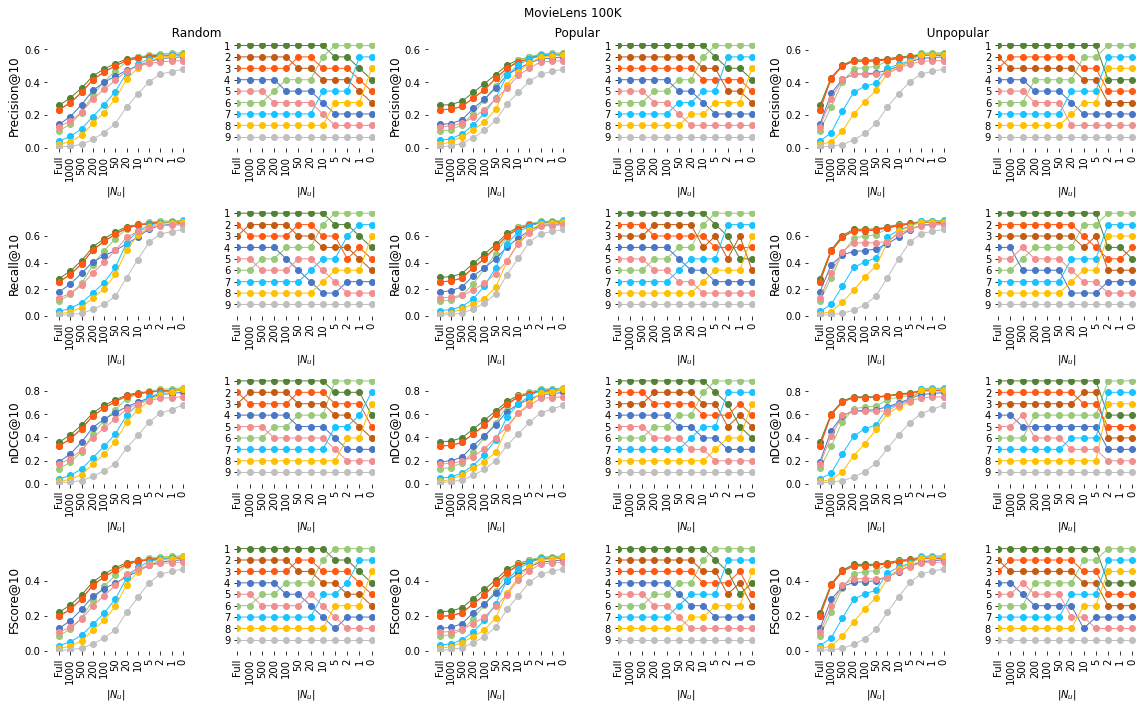

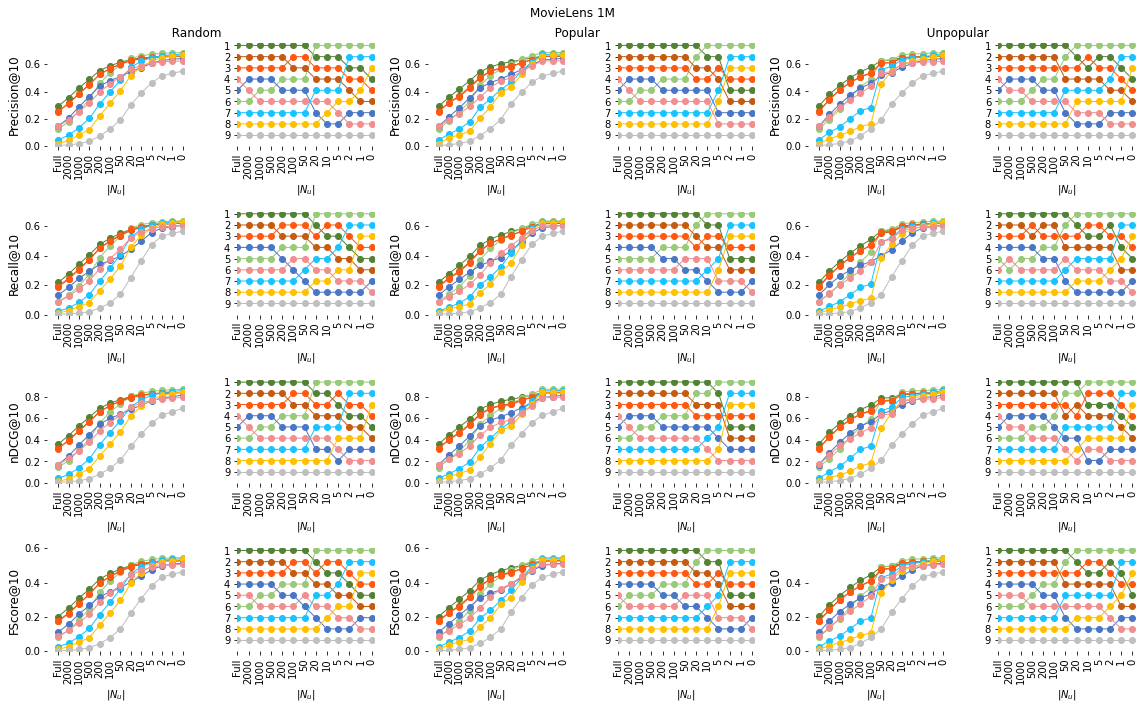

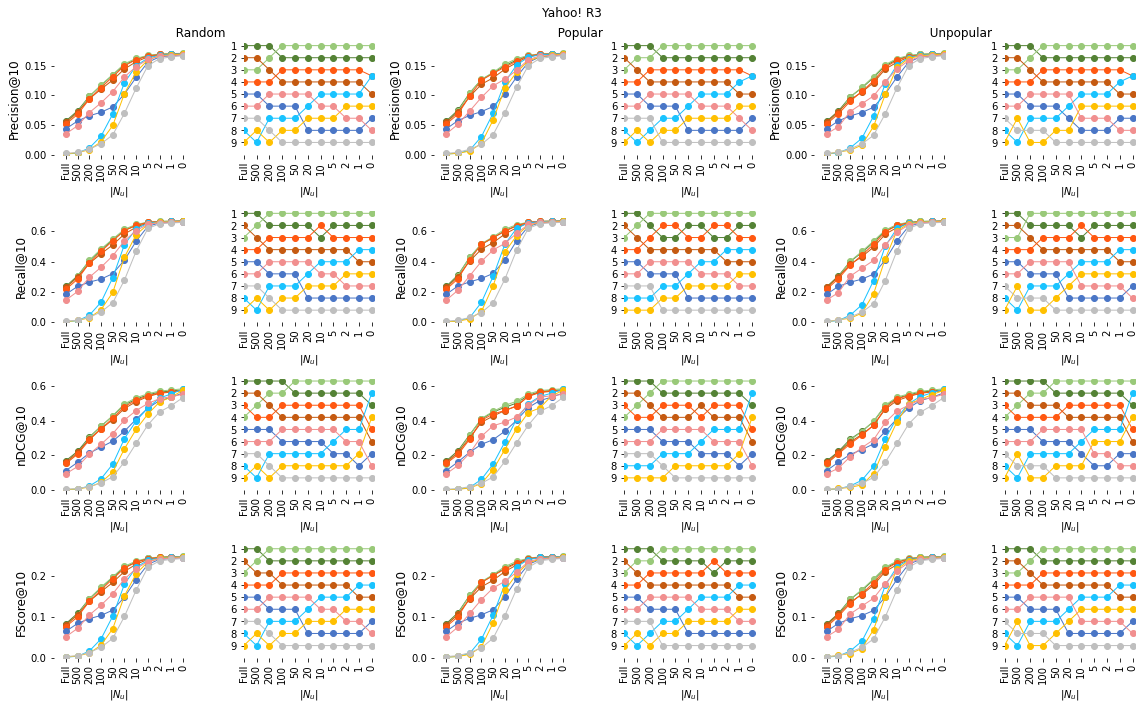

In [35]:
print("figure3.sampler\n")


def plot_figure3(split, axes):
    print(split)
    data = get_figure_data("figure3." + split + ".txt")
    precision, recall, ndcg, fscore = split_metrics(data)

    ndcg_rank = rank(ndcg)
    precision_rank = rank(precision)
    recall_rank = rank(recall)
    fscore_rank = rank(fscore)

    rows = [
        "Row {}".format(row)
        for row in ["Precision@10", "Recall@10", "nDCG@10", "FScore@10"]
    ]

    # fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))

    # for ax, col in zip(axes[0], cols):
    #    ax.set_title(col)
    #    #ax.set_xlabel('|Nu|')

    for ax, row in zip(axes[:, 0], rows):
        ax.set_ylabel(row, rotation=90, size="large")

    plot_metrics(precision, axes[0][0], ylabel="Precision@10")
    plot_metrics(recall, axes[1][0], ylabel="Recall@10")
    plot_metrics(ndcg, axes[2][0], ylabel="nDCG@10")
    artists, recommender = plot_metrics(fscore, axes[3][0], ylabel="FScore@10")

    plot_system_rankings(precision_rank, axes[0][1], xticks=ndcg["Target size"].array)
    plot_system_rankings(recall_rank, axes[1][1], xticks=ndcg["Target size"].array)
    plot_system_rankings(ndcg_rank, axes[2][1], xticks=ndcg["Target size"].array)
    plot_system_rankings(fscore_rank, axes[3][1], xticks=ndcg["Target size"].array)
    return artists, recommender


for i, dataset in enumerate(datasets):
    fig, axes = plt.subplots(nrows=4, ncols=2 * len(class_splits), figsize=(14, 12))
    for j, sampler in enumerate(class_splits):
        print(str(i) + dataset + str(j) + sampler)
        artists, recommender = plot_figure3(dataset + sampler, axes[:, j * 2:2 * j + 2])
        axes[0, j * 2].set_title("                                          " + dataset_names[sampler])

    fig.suptitle(dataset_names[dataset])
    # if (True):
    if (is_legend_enabled):
        plt.legend(
            artists,
            recommender,
            bbox_to_anchor=(1.05, 1),
            loc="upper left",
            # title="Recommender",
            title_fontsize="x-large",
        )
    fig.set_size_inches(16, 10)
    fig.tight_layout()
    png = os.path.join(data_dir, "figure3." + dataset + ".png")
    fig.savefig(png, format="png", dpi=300, transparent=False)

plt.show()

In [36]:
print("def plot_figure4(...\n")


def plot_figure4(dataset, ax1, ax2, ax3, ax4, legend=True, yahoo=None):
    data = get_figure_data("figure4." + dataset + ".txt")
    ndcg = data["nDCG@10"]
    precision = data["P@10"]
    recall = data["Recall@10"]
    fscore = data["FScore@10"]

    rows = ["Row {}".format(row) for row in ["Precision@10", "Recall@10", "nDCG@10", "FScore@10"]]

    for ax, row in zip([ax1, ax2, ax3, ax4], rows):
        ax.set_ylabel(row, rotation=90, size="large")

    twinx = "Sum of p-values"

    precision.head()
    plot_metrics(
        precision.iloc[:, :-1],
        ax1,
        ylabel="Precision@10",
        twinx=precision[twinx],
        xlabel="",
    )
    plot_metrics(
        recall.iloc[:, :-1],
        ax2,
        ylabel="Recall@10",
        twinx=recall[twinx],
        xlabel="",
    )
    plot_metrics(
        ndcg.iloc[:, :-1],
        ax3,
        ylabel="nDCG@10",
        twinx=ndcg[twinx],
    )
    artists, recommender = plot_metrics(
        fscore.iloc[:, :-1],
        ax4,
        ylabel="FScore@10",
        twinx=fscore[twinx],
    )

    if yahoo is not None:
        print("yahoo")
        ax1, ax2, ax3, ax4 = yahoo
        data = get_figure_data("figure4.yahoo.txt")
        ndcg = data["nDCG@10"]
        precision = data["P@10"]
        recall = data["Recall@10"]
        fscore = data["FScore@10"]

        plot_metrics(
            precision.iloc[:, :-1],
            ax1,
            ylabel="Precision@10",
            twinx=precision[twinx],
            xlabel="",
        )
        plot_metrics(
            recall.iloc[:, :-1],
            ax2,
            ylabel="Recall@10",
            twinx=recall[twinx],
            xlabel="",
        )
        plot_metrics(
            ndcg.iloc[:, :-1],
            ax3,
            ylabel="nDCG@10",
            twinx=ndcg[twinx],
        )
        artists, recommender = plot_metrics(
            fscore.iloc[:, :-1],
            ax4,
            ylabel="FScore@10",
            twinx=fscore[twinx],
        )

    if legend == True:
        if (is_legend_enabled):
            plt.legend(artists, recommender, bbox_to_anchor=(1.05, 1), loc="best")
        fig.suptitle(dataset_names[dataset])

    return artists, ndcg.columns[1:]

def plot_figure4(...



figure4.full

C:\Projects\RecSys2020\results\figure4.ml1m.txt
yahoo
C:\Projects\RecSys2020\results\figure4.yahoo.txt


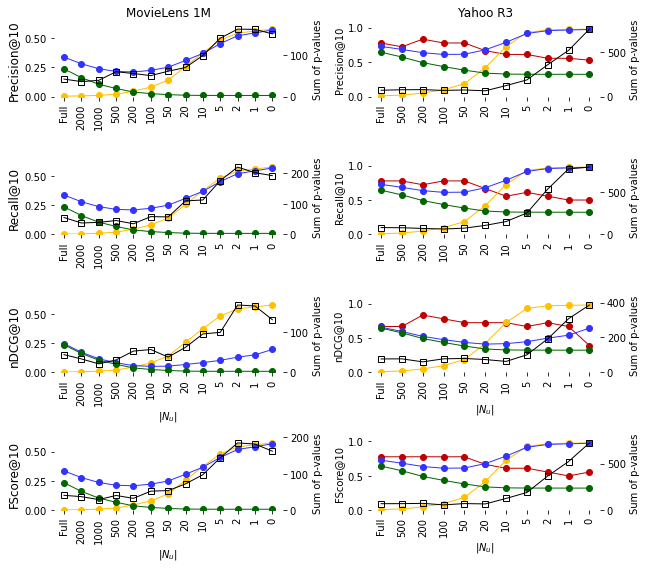

In [37]:
print("figure4.full\n")

fig, axes = plt.subplots(nrows=4, ncols=2)

artists, recommender = plot_figure4(
    "ml1m",
    axes[0, 0],
    axes[1, 0],
    axes[2, 0],
    axes[3, 0],
    legend=False,
    yahoo=(axes[0, 1], axes[1, 1], axes[2, 1], axes[3, 1]),
)

axes[0][0].set_title("MovieLens 1M")
axes[0][1].set_title("Yahoo R3")

# plt.legend(
#     artists,
#     recommender,
#     loc="upper center",
#     bbox_to_anchor=(0.2, -0.05),
#     fancybox=True,
#     shadow=True,
#     ncol=2,
# )
if (is_legend_enabled):
    plt.legend(artists, recommender, bbox_to_anchor=(1.05, 1), loc="best")

box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Put a legend below current axis
# plt.legend(
#    loc="upper center", bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5
# )


fig.set_size_inches(9, 8)
# fig.tight_layout()
plt.tight_layout()

png = os.path.join(data_dir, "figure4.full.png")
fig.savefig(png, format="png", dpi=300, transparent=False)
# dpi=1200
plt.show()
# plt.close("all")

figure4.cross-validation.png

ml100k 0
C:\Projects\RecSys2020\results\figure4.ml100k.txt
ml100k-popular 1
C:\Projects\RecSys2020\results\figure4.ml100k-popular.txt
ml100k-unpopular 2
C:\Projects\RecSys2020\results\figure4.ml100k-unpopular.txt
ml1m 3
C:\Projects\RecSys2020\results\figure4.ml1m.txt
ml1m-popular 4
C:\Projects\RecSys2020\results\figure4.ml1m-popular.txt
ml1m-unpopular 5
C:\Projects\RecSys2020\results\figure4.ml1m-unpopular.txt
yahoo 6
C:\Projects\RecSys2020\results\figure4.yahoo.txt
yahoo-popular 7
C:\Projects\RecSys2020\results\figure4.yahoo-popular.txt
yahoo-unpopular 8
C:\Projects\RecSys2020\results\figure4.yahoo-unpopular.txt


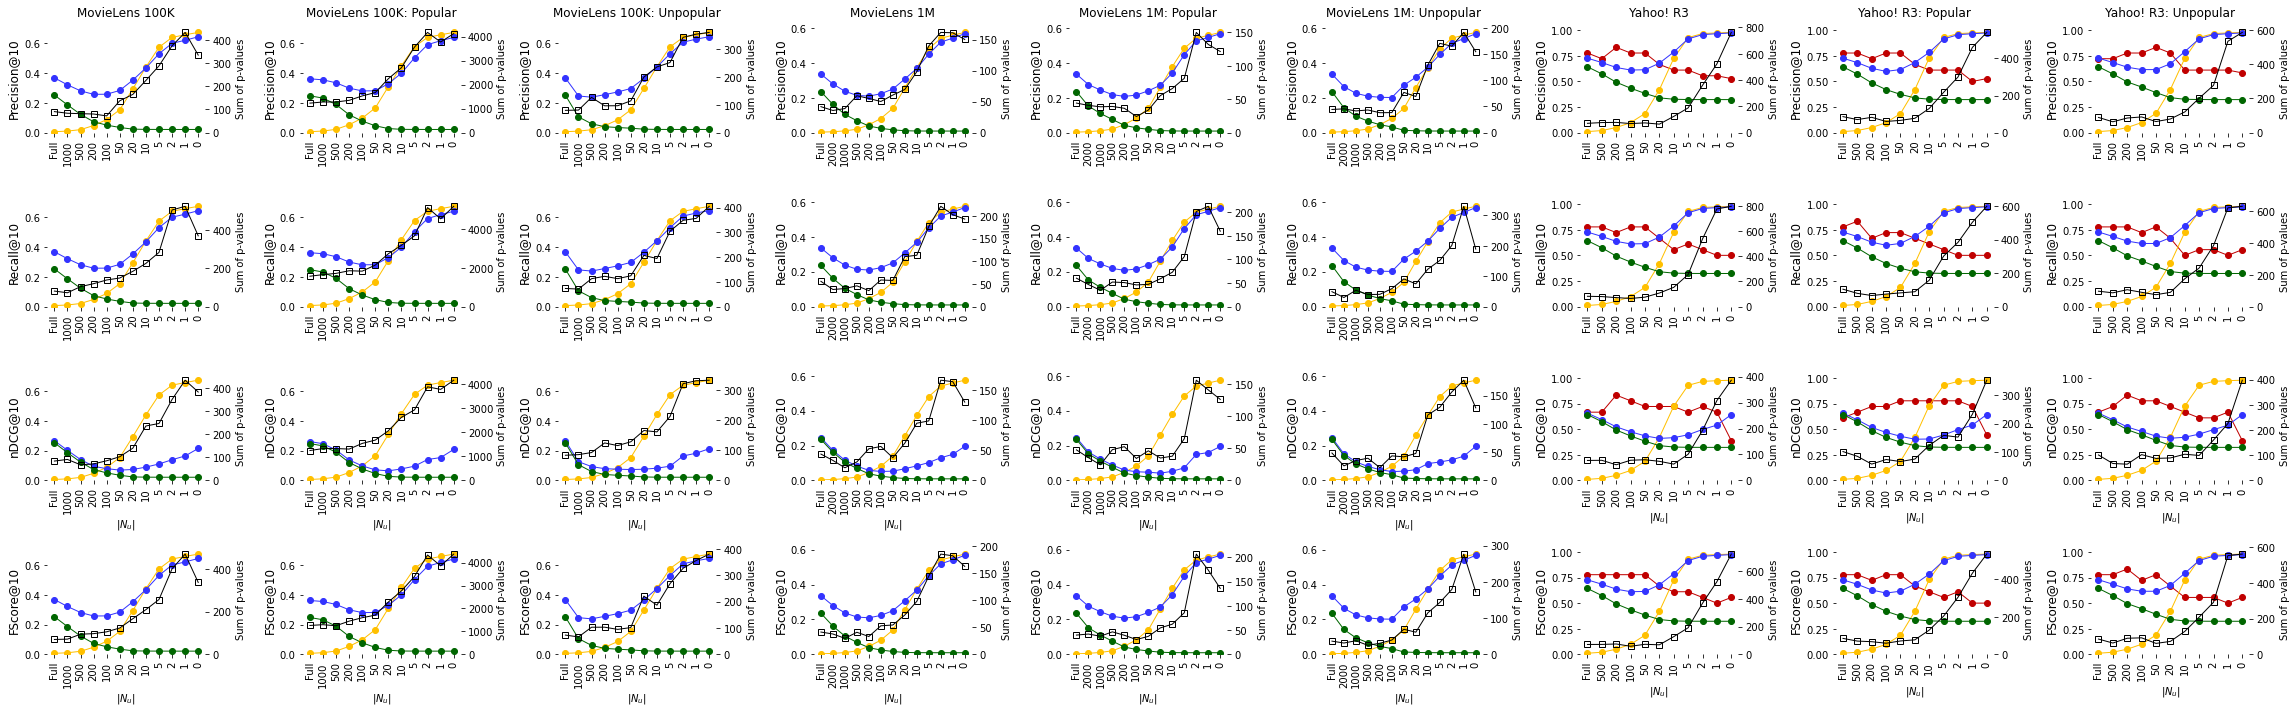

In [38]:
print("figure4.cross-validation.png\n")
fig, ax = plt.subplots(4, len(splits))


# firstColumn, secondColumn = split_list(splits)


def plot_column(split, ax, col):
    print(split, col)
    ax1 = ax[0, col]
    ax2 = ax[1, col]
    ax3 = ax[2, col]
    ax4 = ax[3, col]
    artists, recommenders = plot_figure4(split, ax1, ax2, ax3, ax4, legend=False)
    ax1.set_title(dataset_names[split])
    return artists, recommenders


for i, split in enumerate(splits):
    artists, recommenders = plot_column(split, ax, col=i)

# for i, split in enumerate(secondColumn):
#     artists, recommenders = plot_column(i, split, ax, col=1)

if (is_legend_enabled):
    plt.legend(
        artists,
        recommenders,
        bbox_to_anchor=(-3.7, -0.7),
        # loc="upper left",
        title_fontsize="xx-large",
        loc="lower center",
        ncol=5,
    )

# fig.legend(
#     artists[:, 1],
#     artists[:, 0],
#     loc="lower center" ,
#     ncol=5,
# )

fig.set_size_inches(32, 10)
fig.tight_layout()

png = os.path.join(data_dir, "figure4.sampling.full.png")
fig.savefig(png, format="png", dpi=300)
plt.show()
# plt.close("all")

figure4.sampling.png

ml100k 0
C:\Projects\RecSys2020\results\figure4.ml100k.txt
ml100k-popular 1
C:\Projects\RecSys2020\results\figure4.ml100k-popular.txt
ml100k-unpopular 2
C:\Projects\RecSys2020\results\figure4.ml100k-unpopular.txt
ml1m 0
C:\Projects\RecSys2020\results\figure4.ml1m.txt
ml1m-popular 1
C:\Projects\RecSys2020\results\figure4.ml1m-popular.txt
ml1m-unpopular 2
C:\Projects\RecSys2020\results\figure4.ml1m-unpopular.txt
yahoo 0
C:\Projects\RecSys2020\results\figure4.yahoo.txt
yahoo-popular 1
C:\Projects\RecSys2020\results\figure4.yahoo-popular.txt
yahoo-unpopular 2
C:\Projects\RecSys2020\results\figure4.yahoo-unpopular.txt


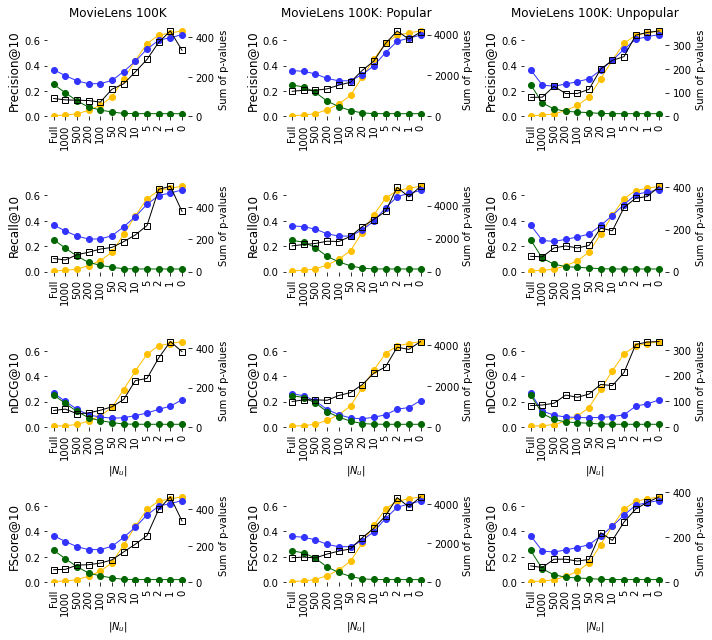

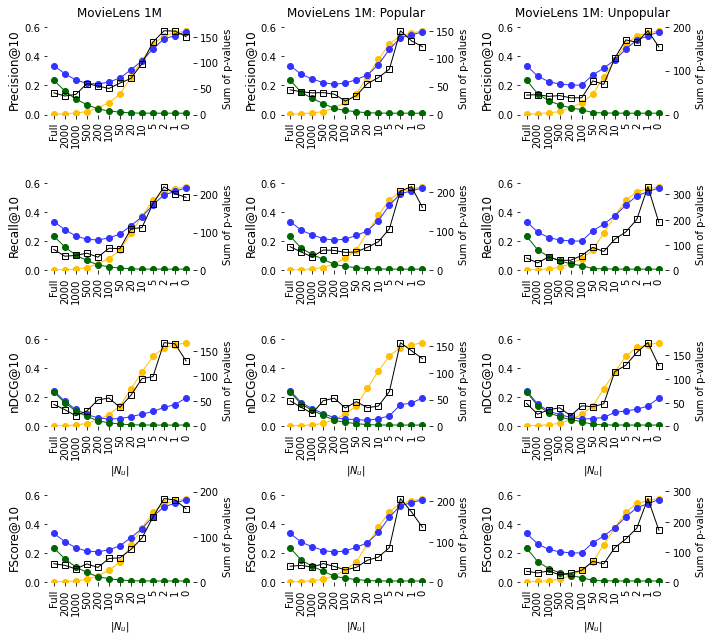

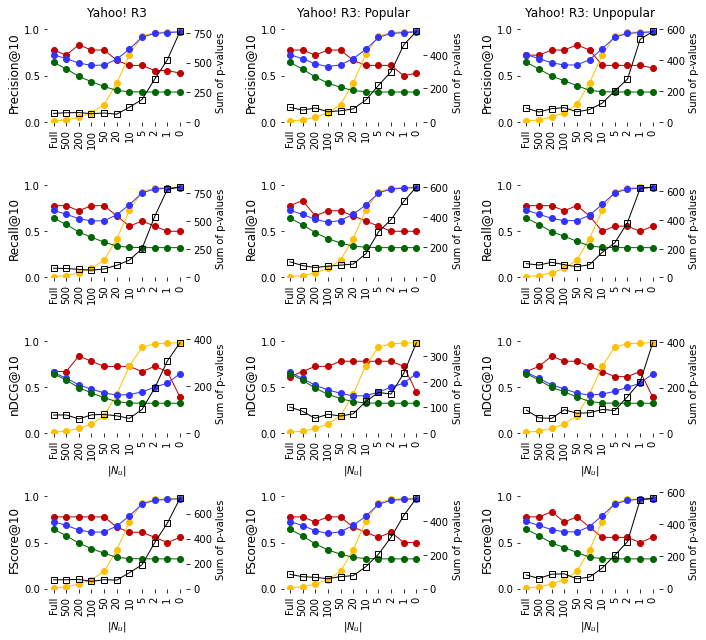

In [44]:
print("figure4.sampling.png\n")

for i, dataset in enumerate(datasets):
    fig, ax = plt.subplots(4, len(class_splits))
    for j, sampler in enumerate(class_splits):
        # print(str(i) + dataset + str(j) + sampler)
        artists, recommenders = plot_column(dataset + sampler, ax, col=j)

    if (is_legend_enabled):
    # if (True):
        plt.legend(
            artists,
            recommenders,
            bbox_to_anchor=(-1, -0.7),
            loc="upper left",
            title_fontsize="xx-large",
            # loc="lower center",
            ncol=2,
        )

    fig.set_size_inches(10, 9)
    fig.tight_layout()

    png = os.path.join(data_dir, "figure4.sampling." + dataset + ".png")
    fig.savefig(png, format="png", dpi=300)
plt.show()
# plt.close("all")

figure5.cross-validation.png

0ml100k0
C:\Projects\RecSys2020\results\figure5.ml100k-nofill.txt
single metric file
0ml100k1-popular
C:\Projects\RecSys2020\results\figure5.ml100k-popular-nofill.txt
single metric file
0ml100k2-unpopular
C:\Projects\RecSys2020\results\figure5.ml100k-unpopular-nofill.txt
single metric file
1ml1m0
C:\Projects\RecSys2020\results\figure5.ml1m-nofill.txt
single metric file
1ml1m1-popular
C:\Projects\RecSys2020\results\figure5.ml1m-popular-nofill.txt
single metric file
1ml1m2-unpopular
C:\Projects\RecSys2020\results\figure5.ml1m-unpopular-nofill.txt
single metric file
2yahoo0
C:\Projects\RecSys2020\results\figure5.yahoo-nofill.txt
single metric file
2yahoo1-popular
C:\Projects\RecSys2020\results\figure5.yahoo-popular-nofill.txt
single metric file
2yahoo2-unpopular
C:\Projects\RecSys2020\results\figure5.yahoo-unpopular-nofill.txt
single metric file


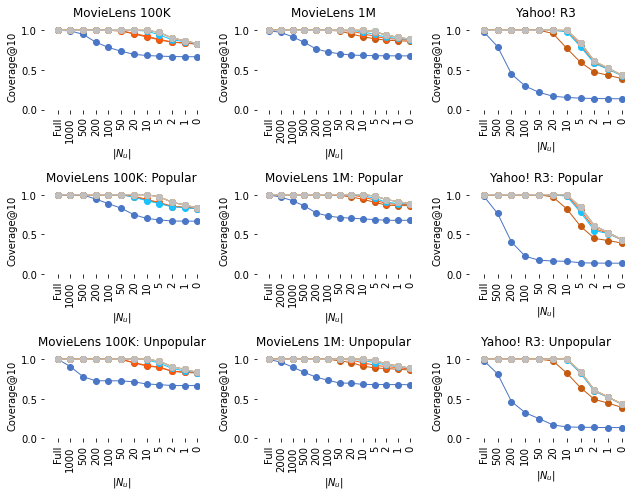

In [40]:
print("figure5.cross-validation.png\n")
fig, axes = plt.subplots(nrows=len(class_splits), ncols=len(datasets), figsize=(8, 10))
# for split, ax in zip(splits, axes):
#     print(split)
#     coverage = pd.read_table(
#         r"C:\Projects\RecSys2020\results\\figure5." + split + "-nofill.txt",
#         sep="\t",
#         header=4,
#         nrows=13,
#     )
#
#     artists, recommenders = plot_metrics(
#         coverage, ax, ylabel="Coverage@10", title=split
#     )

for i, dataset in enumerate(datasets):
    for j, sampler in enumerate(class_splits):
        print(str(i) + dataset + str(j) + sampler)
        ax = axes[j, i]
        coverage = get_figure_data("figure5." + dataset + sampler + "-nofill.txt")
        # coverage = pd.read_table(
        #     r"C:\Projects\RecSys2020\results\\figure5." + dataset + sampler + "-nofill.txt",
        #     sep="\t",
        #     header=4,
        #     nrows=13,
        # )

        artists, recommenders = plot_metrics(
            coverage["Coverage@10"], ax, ylabel="Coverage@10", title=dataset_names[dataset + sampler]
        )

# if (True):
if (is_legend_enabled):
    plt.legend(
        artists,
        recommenders,
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        # title="Recommender",
        title_fontsize="x-large",
    )

png = os.path.join(data_dir, "figure5.cross-validation.png")
# fig.suptitle(split)
fig.set_size_inches(9, 7)
fig.tight_layout()
fig.savefig(png, format="png", dpi=300)
# dpi=1200
plt.show()
# plt.close("all")

figure5.cross-validation.b.png



NameError: name 'split_list' is not defined

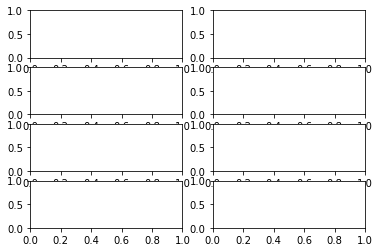

In [42]:
print("figure5.cross-validation.b.png\n")
fig, axs = plt.subplots(len(splits) // 2, 2)
firstColumn, secondColumn = split_list(splits)

for i, split in enumerate(firstColumn):
    coverage = pd.read_table(
        r"C:\Projects\RecSys2020\results\\" + split + r"\figure5.txt",
        sep="\t",
        header=4,
        nrows=13,
    )
    print(split, i)
    ax = axs[i, 0]
    plot_metrics(coverage, ax, ylabel="Coverage@10", title=split)

for i, split in enumerate(secondColumn):
    coverage = pd.read_table(
        r"C:\Projects\RecSys2020\results\\" + split + r"\figure5.txt",
        sep="\t",
        header=4,
        nrows=13,
    )
    print(split, i)
    ax = axs[i, 1]
    artists, recommender = plot_metrics(coverage, ax, ylabel="Coverage@10", title=split)

if (is_legend_enabled):
    plt.legend(
        artists,
        recommender,
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        # title="Recommender",
        title_fontsize="xx-large",
    )
fig.set_size_inches(14, 8)
fig.tight_layout()
png = os.path.join(data_dir, "figure5.cross-validation.b.png")
fig.savefig(png, format="png", dpi=300)
plt.show()
# plt.close("all")

In [ ]:
print("figure5.full.png\n")
fig, (ax1, ax2) = plt.subplots(1, 2)
firstColumn, secondColumn = split_list(splits)
split = "ShuffleSplit"
coverage = pd.read_table(
    r"C:\Projects\RecSys2020\results\\" + split + r"\figure5.txt",
    sep="\t",
    header=4,
    nrows=13,
)
plot_metrics(coverage, ax1, ylabel="Coverage@10", title="MovieLens1M")

coverage = pd.read_table(
    r"C:\Projects\RecSys2020\results\KFold\figure5.txt",
    sep="\t",
    header=4,
    nrows=11,
)
artists, recommender = plot_metrics(coverage, ax2, ylabel="Coverage@10", title="Yahoo! R3")

if (is_legend_enabled):
    plt.legend(
        artists,
        recommender,
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        # title="Recommender",
        title_fontsize="xx-large",
    )
fig.set_size_inches(8, 3)
fig.tight_layout()
png = os.path.join(data_dir, "figure5.full.png")
fig.savefig(png, format="png", dpi=300)
plt.show()
# plt.close("all")

In [ ]:
plt.close("all")
plt.show()